## Context

The plproject aim is to predict the matches of english premier league. English premeir league contains matches on each year(season wise)in which 20 teams participate in the competition. The  matches are scheduled as seasons longing upto 1 year.
The seasons usually starts from august and ends on the next year in april.

### Objective
The objective is to predict the match result of a premier league match.
The match can be predicted  by just giving the Home and Away team. 


#Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Loadinng the dataset

In [2]:
df = pd.read_excel('Case2.xlsx')

In [ ]:
df=df.iloc[:,:7]

#### We have consider the dataset from the years 2003-2022.
#### For this dataset also, the features are common
#### The performance of the team are constantly changing as the players are going In and Out of the team.
 


### Important features

Div = League Division

Date = Match Date (dd/mm/yy)

Time = Time of match kick off

HomeTeam = Home Team

AwayTeam = Away Team

FTHG = Full Time Home Team Goals

FTAG = Full Time Away Team Goals

FTR  = Full Time Result (H=Home Win, D=Draw, A=Away Win)
 
 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7676 entries, 0 to 7675
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Div       7676 non-null   object        
 1   Date      7676 non-null   datetime64[ns]
 2   HomeTeam  7676 non-null   object        
 3   AwayTeam  7676 non-null   object        
 4   FTHG      7676 non-null   int64         
 5   FTAG      7676 non-null   int64         
 6   FTR       7676 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 419.9+ KB
None


In [ ]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR'], dtype='object')

In [ ]:
df.describe()

,FTHG,FTAG
count,7676.000000,7676.000000
mean,1.512767,1.157243
std,1.293318,1.141872
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,9.000000,9.000000


In [ ]:
df.dtypes

Div                 object
Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
dtype: object

In [ ]:
df.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,E0,2002-08-17,Blackburn,Sunderland,0,0,D
1,E0,2002-08-17,Charlton,Chelsea,2,3,A
2,E0,2002-08-17,Everton,Tottenham,2,2,D
3,E0,2002-08-17,Fulham,Bolton,4,1,H
4,E0,2002-08-17,Leeds,Man City,3,0,H
5,E0,2002-08-17,Man United,West Brom,1,0,H
6,E0,2002-08-17,Southampton,Middlesbrough,0,0,D
7,E0,2002-08-18,Arsenal,Birmingham,2,0,H
8,E0,2002-08-18,Aston Villa,Liverpool,0,1,A
9,E0,2002-08-19,Newcastle,West Ham,4,0,H


In [ ]:
Arsenal=df
AstonVilla=df
Chelsea=df
ManUnited=df
ManCity=df
Tottenham=df
WestHam=df

teamnames=['Arsenal','Aston Villa','Chelsea','Man United','Man City','Tottenham','West Ham']
teamvariable=[Arsenal,AstonVilla,Chelsea,ManUnited,ManCity,Tottenham,WestHam]

for i in range(len(teamnames)):
  h=df.loc[df['HomeTeam'] == teamnames[i]]
  a=df.loc[(df['AwayTeam'] == teamnames[i])] 
  teamvariable[i]=pd.concat([h,a],axis=0)
  ## ENCODING
  ## f= encoded values of manchester united as hometeam
  ## e= encoded values of manchester united as awayteam

  f=pd.get_dummies(teamvariable[i]['HomeTeam']) ## Taking the dummy values in the homeTeam colummn
  e=pd.get_dummies(teamvariable[i]['AwayTeam']) ## Taking the dummmy values in the  awayTeam column
  e=e.replace([1],[-1])
  e=e.add(f)

  teamvariable[i]=teamvariable[i].join(e)

  teamvariable[i]=teamvariable[i].drop('HomeTeam',axis=1)
  teamvariable[i]=teamvariable[i].drop('AwayTeam',axis=1)
  teamvariable[i]=teamvariable[i].drop('Date',axis=1)
  teamvariable[i]=teamvariable[i].drop('Div',axis=1)

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=360, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


manutdh=teamvariable[3].loc[teamvariable[3]['Man United']==1]
manutda=teamvariable[3].loc[teamvariable[3]['Man United']==-1]
 


### Graph showing the Wins of Manchester united in Home, away and Draw



#### When played in Home

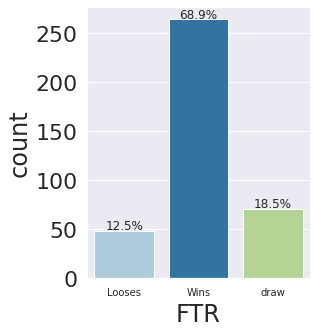

In [ ]:
manutdh= manutdh.replace(['H','A','D'],['Wins','Looses','draw'])
labeled_barplot(manutdh, "FTR", perc=True)

#### Observations
##### The graph shows that the manchestr united has won 68 percent of the matches when played in the home ground and lost only 18.3 percent
##### Draw has occured a 12 percent of times

### When played in away

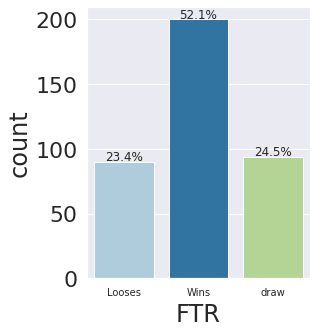

In [ ]:
manutda= manutda.replace(['H','A','D'],['Looses','Wins','draw'])
labeled_barplot(manutda, "FTR", perc=True)

#### Observations
##### The graph shows that the manchestr united has won 52 percent of the matches when played in the home ground and lost only 23.3 percent
##### Draw has occured a 24 percent of times
##### The percent of wins has decreased in the away venues

In [ ]:
manutd1=manutdh[['FTR','FTHG']]
manutd1=manutd1.drop('FTHG',axis=1)
 
manutd2=manutda[['FTR','FTHG']]
manutd2=manutd2.drop('FTHG',axis=1)
 
manutd= pd.concat([manutd1, manutd2], axis =0) 

### Showing the Total percent of Wins, Looses and draw

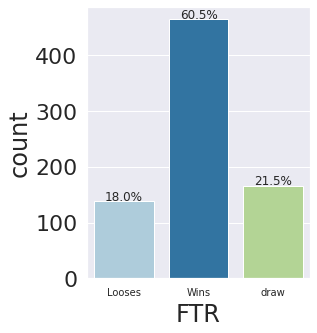

In [ ]:
 labeled_barplot(manutd, "FTR", perc=True)

##### The team has won a total 60 percent of wins, followed by 18 percent of looses and 21 percent draw

# Univariate analysis

## Target variable

#### Full time result feature or FTR feature is taken as the target variable for training the models for all the three cases we considered

#### The table shows below the distribution of targets variables as 
#### H - Represents Home team win
#### A - Represents Away team win
#### D - Represents Draw

(array([1906.,    0.,    0.,    0.,    0., 2257.,    0.,    0.,    0.,
        3513.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

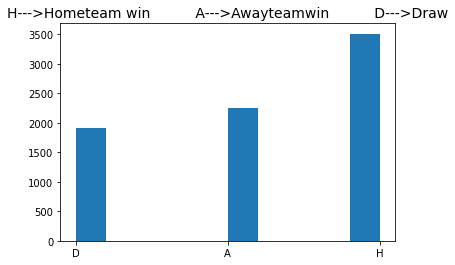

In [ ]:
plt.title('H--->Hometeam win          A--->Awayteamwin          D--->Draw', fontsize=14)
plt.hist(df['FTR'])

####  From graph below, we can see the most no of wins happened for the home teams with around 3500 wins followed by away teams wins of 2200, The draw happened for around 1800 times

In [ ]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### The below boxplot shows the numerical distribution of Overall goals scored by all the teams in total .


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


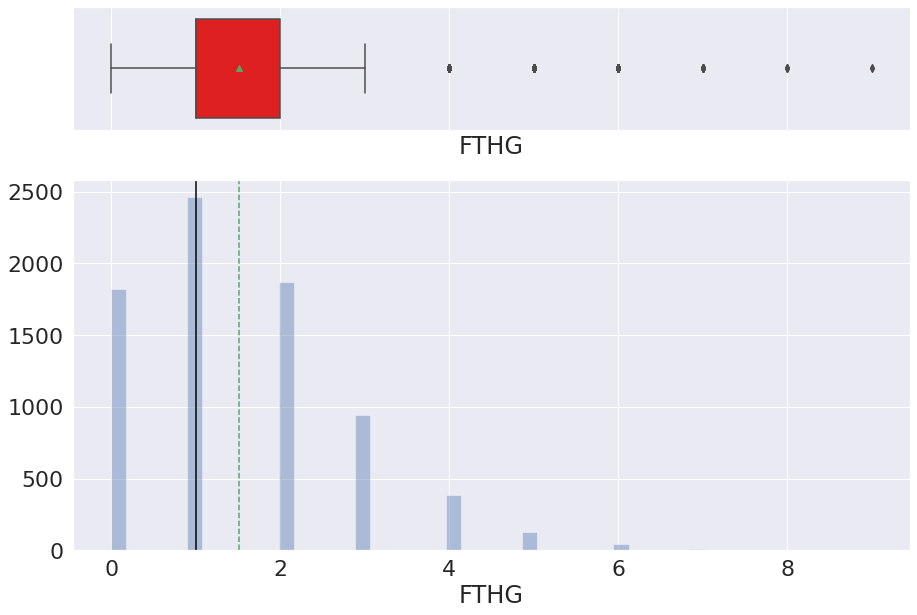

In [ ]:
histogram_boxplot(df.FTHG) 

#### We can see that the most occured value of Home team after full time are 0,1,2.
#### Rarely it is  seen that the home team scores 5,6,7 goals 

 ### Graph shows the numerical distrbution of each numerical variable in the dataset

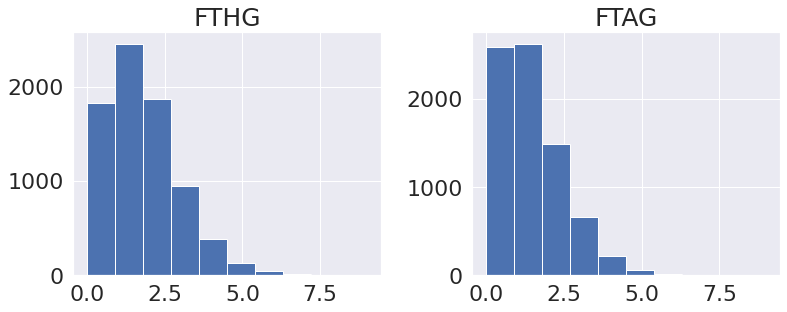

In [ ]:
# lets plot histogram of all numerical variables

all_col = df.select_dtypes(include=np.number).columns.tolist()
#all_col.remove("HomeTeam")
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    plt.hist(df[all_col[i]])
    # sns.histplot(df[all_col[i]], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

## Observations
Most of the graphs are rightly skewed with some of the graph showing normal distribution trends

# Multivariate analysis

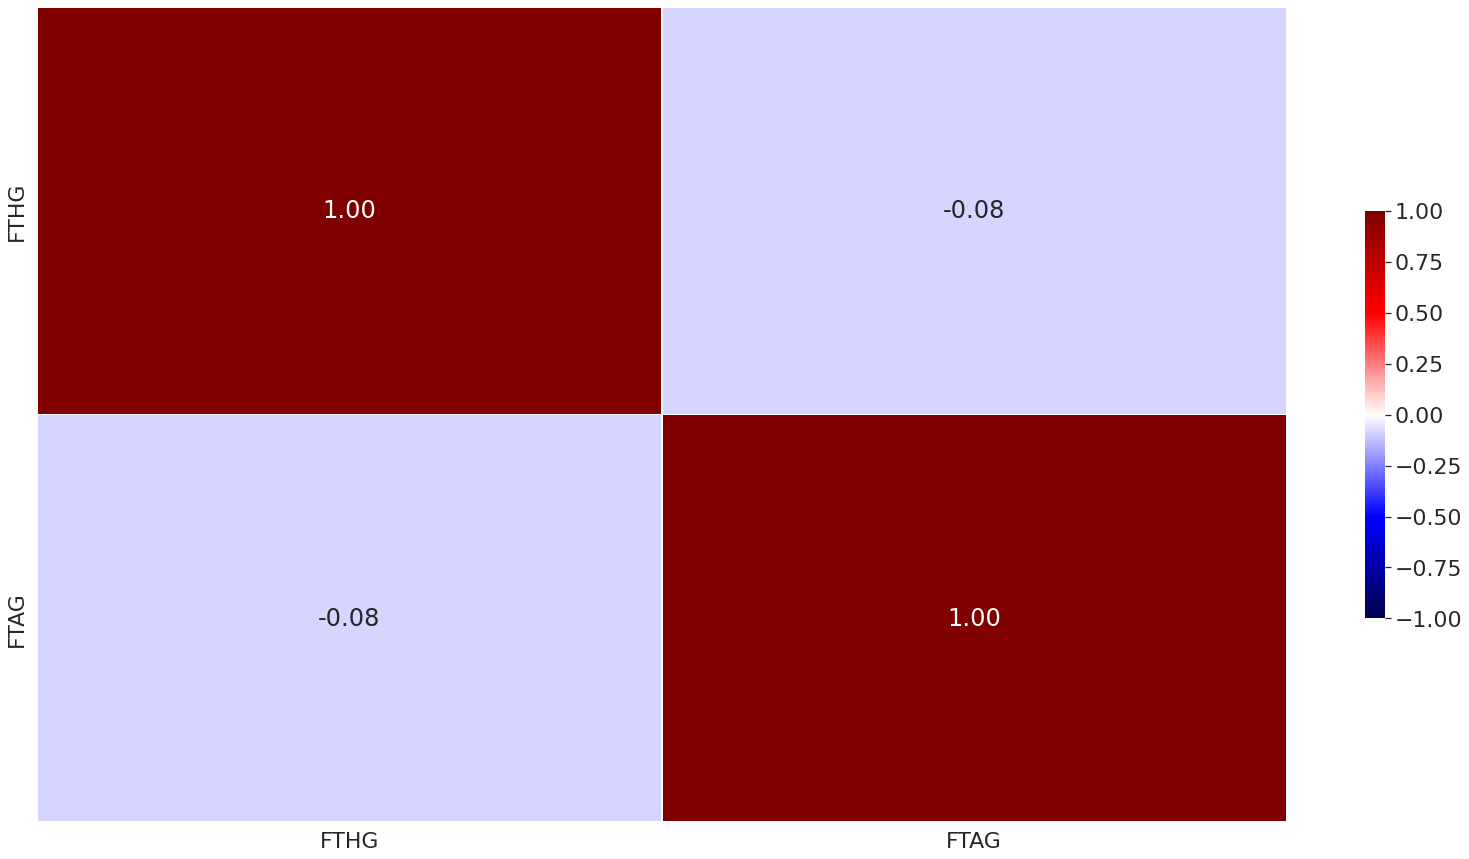

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
#numeric_columns.remove("Year")  # dropping year column as it is temporal variable
corr = (
    df[numeric_columns].corr())
  # sorting correlations w.r.t life expectancy

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap="seismic",
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

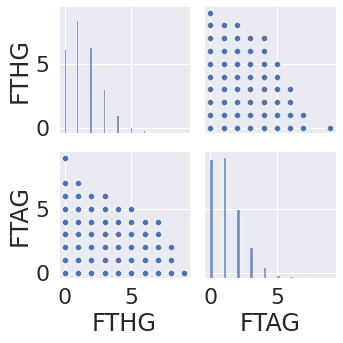

In [ ]:
## Displaying the correlation matrix
sns.pairplot(df)

## The graph showing the results of the matches of each team when on home side and away side

In [ ]:
 ### To identify the winner of each match: if "H"- the home team was the winner, if "A" the away team was the winner, else draw:
df['Winner'] = np.where(df['FTR'] == 'H',df['HomeTeam'],
                          np.where(df['FTR'] == 'A', df['AwayTeam'], "Draw"))
### To identify the result of each match: whether the home team won, the away team won, or drew:
df['Result'] = np.where(df['FTR'] == 'H','HomeTeamWin',
                          np.where(df['FTR'] == 'A', 'AwayTeamWin', "Draw"))
### To identify how many goals did the winner had:
df['Result'] = np.where(df['FTR'] == 'H','HomeTeamWin',
                          np.where(df['FTR'] == 'A', 'AwayTeamWin', "Draw"))
### To get the "Year" of each match:
df['Year']=pd.DatetimeIndex(df['Date']).year
### To get the total number of goals in each match and the goal differences:
df['TotalGoal'] = df['FTHG'] + df['FTAG']
df['GoalDif']= df['FTHG']- df['FTAG']

### Graph showing the overall wins for the home and away teams

In [ ]:
import plotly.express as px
### Group the data by Result:
general = df.groupby('Result')['Result'].count().reset_index(name = "count")
### Apply px.pie:
fig1 = px.pie(general, values ='count', names ='Result', title='Premier league - results from 2003 - 2022', color = 'Result',
             color_discrete_map={'HomeTeamWin':'royalblue',
                                 'AwayTeamWin':'orangered',
                                 'Draw':'lightgreen'})
### Add text and define text information:
fig1.update_traces(textposition='inside', textinfo='percent+value')
fig1.show()

#### We can see that home teams clearly got an advantage of 45 percent match wins as compared to away teams with 28.5 percent
#### The draw percent is coming out to be 24.8 percent

## Pie chart showing wins of each teams 

In [ ]:
### Group by Winner 
teamresult = df.groupby('Winner')['Winner'].count().reset_index(name = "Count")
### Drop the results which were "Draw" as this data was not required for the visualisation
teamresult = teamresult[teamresult.Winner != 'Draw']
teamresult=teamresult.sort_values(['Count'], ascending=False)
teamresult1=teamresult.iloc[0:7]

other=teamresult.iloc[7:]
sum=other['Count'].sum()

othrow={'Winner':'others','Count':sum}

teamresult1= teamresult1.append(othrow, ignore_index=True)
 
### Visualisation
fig2 = px.pie(teamresult1,values = 'Count', names = 'Winner', title = "Premier league  Result from 2003 - 2022 - Most Win Team", color = 'Winner', color_discrete_sequence=px.colors.qualitative.Light24)
fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.show()

### Observation
#### The pie chart shows the overall win distribution top teams and rest of others
#### From the graph, it can be seen that the most no of wins occured for manchester united, followd by chelsea, Arsenal liverpool, Man city and so on.

In [ ]:
### Group by Winner 
teamresult = df.groupby('Winner')['Winner'].count().reset_index(name = "Count")
### Drop the results which were "Draw" as this data was not required for the visualisation
teamresult = teamresult[teamresult.Winner != 'Draw']
### Visualisation
fig2 = px.bar(teamresult, title = "Premier league  Result from 2003 - 2022 - Most Win Team", color = 'Winner', color_discrete_sequence=px.colors.qualitative.Light24)
fig2.update_traces(textposition='inside',)
fig2.show()

### Observations
##### We can see that Man utd, Chelsea, Arsenal has most no of wins, followed by Man city, Liverpool and Tottenham ,
##### Each of the team has percentage of more than 5 of the total wins occured in the preimier league
 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Team')

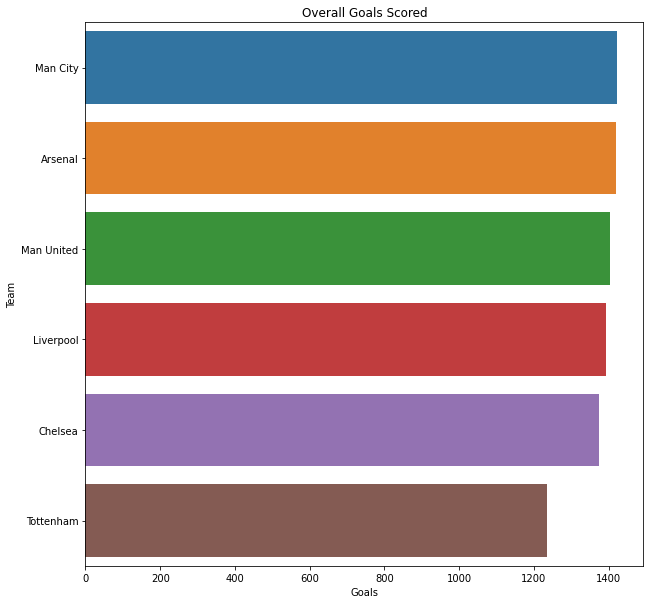

In [ ]:
EPL_home = df.groupby(df.HomeTeam)
EPL_away = df.groupby(df.AwayTeam)

EPL_team_goals = EPL_home['FTHG'].sum() + EPL_away['FTAG'].sum()
EPL_team_goals = EPL_team_goals.reset_index()
EPL_team_goals.rename( columns={0 :'Goals'}, inplace=True )
EPL_team_goals = EPL_team_goals.sort_values(['Goals'], ascending=False)

matplotlib.rcParams['figure.figsize'] = (10, 10)
sns.barplot("Goals",'HomeTeam', data = EPL_team_goals[0:6] )
plt.title('Overall Goals Scored')
plt.ylabel('Team')

##### Manchester united, Manchester city and arsenal are in the top of scoring goals with each team scoring more than 1500 goals in the past 20 seasons
##### The same teams showed the same tendency in the most no of wins

### Total goals scored  by each team in descending order

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Team')

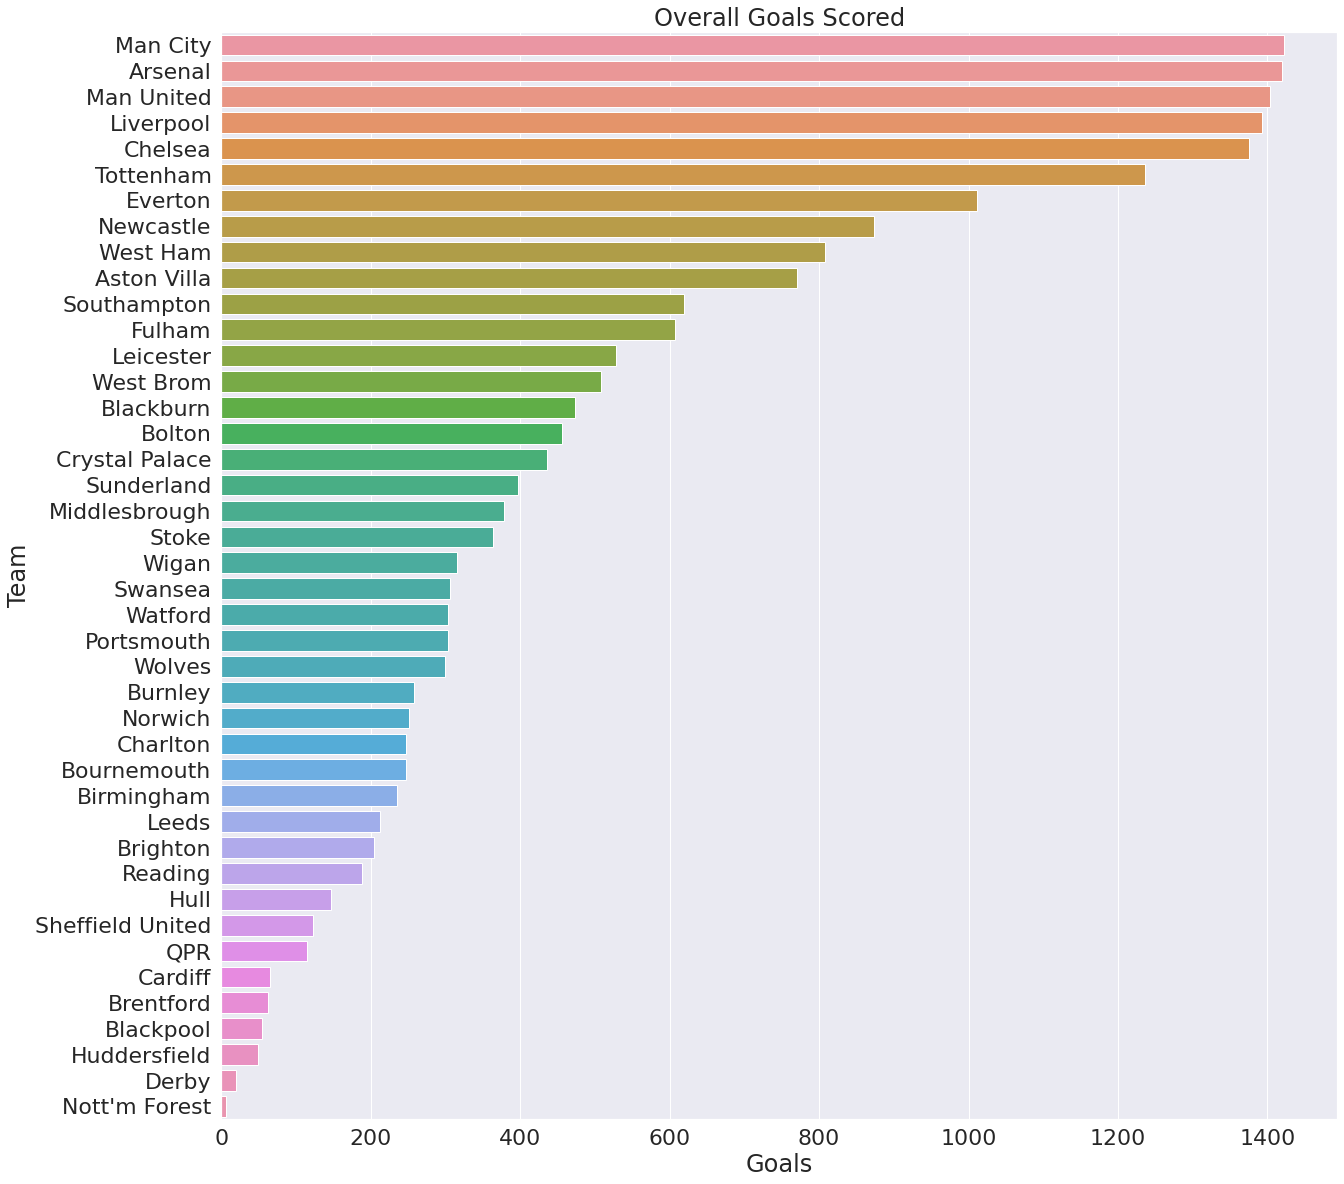

In [ ]:
EPL_home = df.groupby(df.HomeTeam)
EPL_away = df.groupby(df.AwayTeam)

EPL_team_goals = EPL_home['FTHG'].sum() + EPL_away['FTAG'].sum()
EPL_team_goals = EPL_team_goals.reset_index()
EPL_team_goals.rename( columns={0 :'Goals'}, inplace=True )
EPL_team_goals = EPL_team_goals.sort_values(['Goals'], ascending=False)

matplotlib.rcParams['figure.figsize'] = (20, 20)
sns.barplot("Goals",'HomeTeam', data = EPL_team_goals )
plt.title('Overall Goals Scored')
plt.ylabel('Team')

#### From the graph below we can see that man city has most number of goals near about 1400 goals in 20 seasons.
Followed by arsenal in the second place
Manchester united, liverpool, Chelsea are also in the top place in scoring goals

 

###Figure shows the relation of full time result to the full time home goals

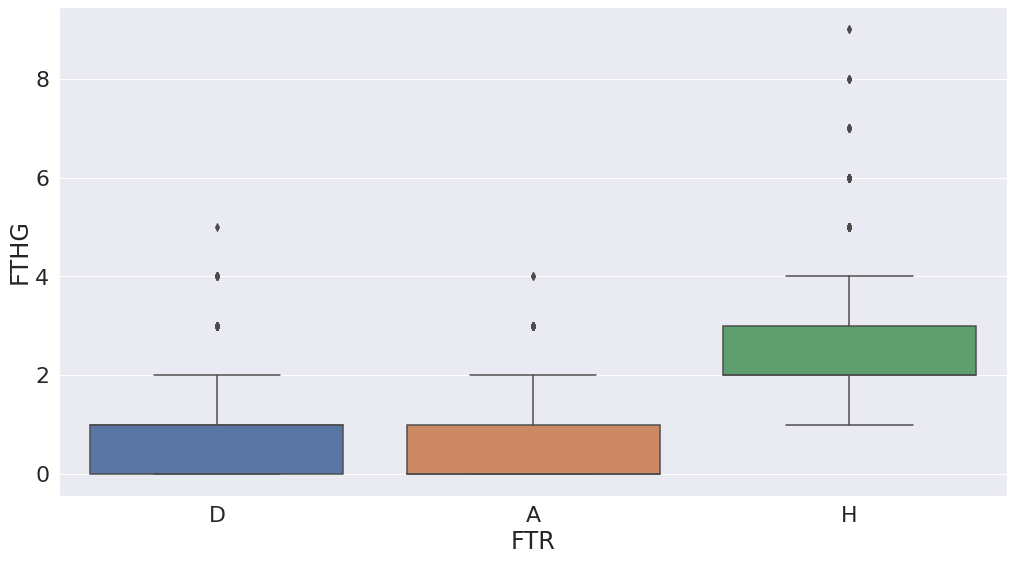

In [ ]:
plt.figure(figsize=(17, 9))
sns.boxplot(y="FTHG", x="FTR", data=df)
plt.show()

### We can see that that when full time home goals tend to be on 2to 4, the home team most likely to win the game

### When the team score goals from 0 to 1, the  team most likely to loose or end up in draw

## Modelling and training the dataset
 

### Dropping unnecessary columns before modelling

In [ ]:

df = df.drop('Winner',axis=1)
df = df.drop('Result',axis=1)
df = df.drop('Year',axis=1)
df = df.drop('TotalGoal',axis=1)
df = df.drop('GoalDif',axis=1)

In [ ]:
 ## Extracting month from the datae column and creating a column for the month
df['month'] = pd.DatetimeIndex(df['Date']).month
df['Day']= pd.DatetimeIndex(df['Date']).day
df['Weekday']=pd.DatetimeIndex(df['Date']).weekday
df.head()
 

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,month,Day,Weekday
0,E0,2002-08-17,Blackburn,Sunderland,0,0,D,8,17,5
1,E0,2002-08-17,Charlton,Chelsea,2,3,A,8,17,5
2,E0,2002-08-17,Everton,Tottenham,2,2,D,8,17,5
3,E0,2002-08-17,Fulham,Bolton,4,1,H,8,17,5
4,E0,2002-08-17,Leeds,Man City,3,0,H,8,17,5


In [ ]:
df=df[['month','Day','Weekday','HomeTeam','AwayTeam','FTR']]

## One hot encoding

In [ ]:
f=pd.get_dummies(df['HomeTeam']) ## Taking the dummy values in the homeTeam colummn
e=pd.get_dummies(df['AwayTeam']) ## Taking the dummmy values in the  awayTeam column
e=e.replace([1],[-1])
e=e.add(f)

df=df.join(e)

##### One hot encoding is done to create dummy values for the HomeTeam column and AwayTeam column
##### Now each team has a seperate column in which 0 value is put when no match is occuring and 1 or -1 value when there is a match
##### The teams which plays in home is denoted as 1 and for the teams which plays away is denoted as -1

In [ ]:
df = df.drop('HomeTeam',axis=1)
df = df.drop('AwayTeam',axis=1)

##### Replacing the FTR or full time result values as 
### 1 for home team win
###-1 for away team win
###  0 for draw

In [ ]:
df = df.replace(['H','A','D'],[1,-1,0])

In [ ]:
print(df.isnull().sum())

month               0
Day                 0
Weekday             0
FTR                 0
Arsenal             0
Aston Villa         0
Birmingham          0
Blackburn           0
Blackpool           0
Bolton              0
Bournemouth         0
Brentford           0
Brighton            0
Burnley             0
Cardiff             0
Charlton            0
Chelsea             0
Crystal Palace      0
Derby               0
Everton             0
Fulham              0
Huddersfield        0
Hull                0
Leeds               0
Leicester           0
Liverpool           0
Man City            0
Man United          0
Middlesbrough       0
Newcastle           0
Norwich             0
Nott'm Forest       0
Portsmouth          0
QPR                 0
Reading             0
Sheffield United    0
Southampton         0
Stoke               0
Sunderland          0
Swansea             0
Tottenham           0
Watford             0
West Brom           0
West Ham            0
Wigan               0
Wolves    

##### Dropping the null values

In [ ]:
df=df.dropna()

In [ ]:
df1=df[7400:]
x_test1=df1.drop('FTR',axis=1)
y_test1=df1['FTR']

## Splitting the model into train and test data

In [ ]:

## Importing the libraries for splitting the dataset
from sklearn.model_selection import train_test_split
# X -> features, y -> label
X = df.drop("FTR", axis=1)
Y = df["FTR"]
# dividing X, y into train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# dividing X, y into train and test data
X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


##### We are modelling the dataset with multiple models
##### The model is apllied on the dataset which consists of encoded home and away teams with target variable FTR

 

### Training and showing the perfomance of the model

#### Importing the libraries for training and testing the model

In [ ]:

## Importing the libraries for showing the model of the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


## From sklearn libraries, we are taking different models for training the model and comparing their accuracies 

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier   
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression

#defining the model variable
knn = KNeighborsClassifier()
xgb = XGBClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier(max_depth=2, random_state=0)


##### We have defined four models for training
##### Each of them being Knn, XGboost, Logistic regression and random forrest
##### These models are trained on the dataset and tested for knowing the perfomance
##### The models which gets the highest accuracy can be used for testing.

#### Training and testing the model

Accuracy of testing: 0.409
Accuracy of training: 0.612
scores of training
[0.38758901 0.40488301 0.39511202 0.3910387  0.3808554 ]
0.39189562687893786
Confusion matrix of testing data
KNN


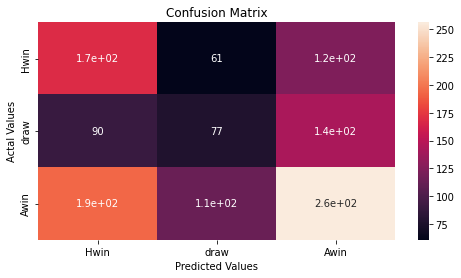




confusion matrix of training data
KNN


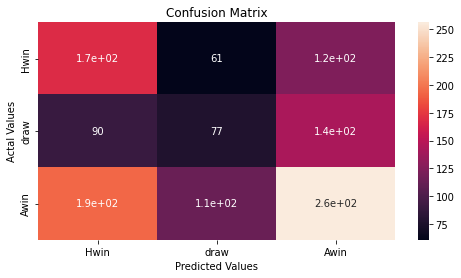




Accuracy of testing: 0.508
Accuracy of training: 0.553
scores of training
[0.51068159 0.51780264 0.51934827 0.51731161 0.52545825]
0.5181204716431889
Confusion matrix of testing data
XGBoost


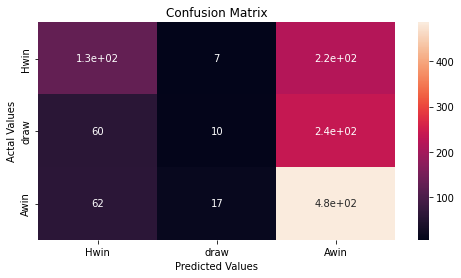




confusion matrix of training data
XGBoost


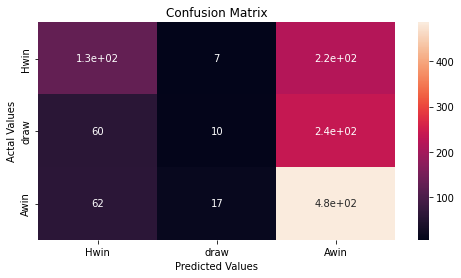

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of testing: 0.511
Accuracy of training: 0.533


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

scores of training
[0.52797558 0.51881994 0.52240326 0.51934827 0.53971487]
0.5256523838036851
Confusion matrix of testing data
Logistic regression


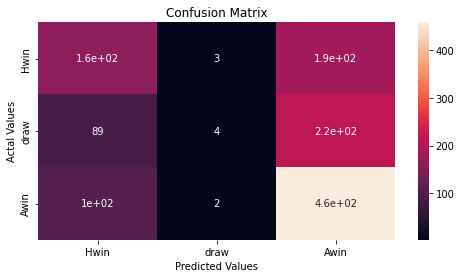




confusion matrix of training data
Logistic regression


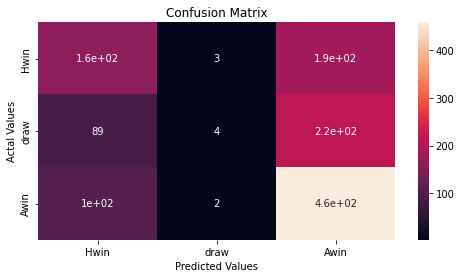




Accuracy of testing: 0.459
Accuracy of training: 0.462
scores of training
[0.46185148 0.46185148 0.46130346 0.46130346 0.46130346]
0.46152266742359416
Confusion matrix of testing data
Random forest


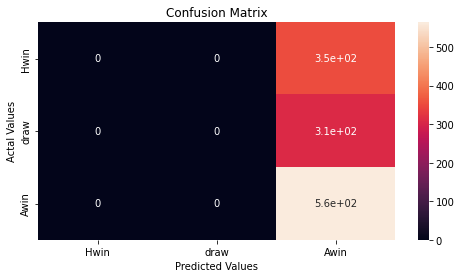




confusion matrix of training data
Random forest


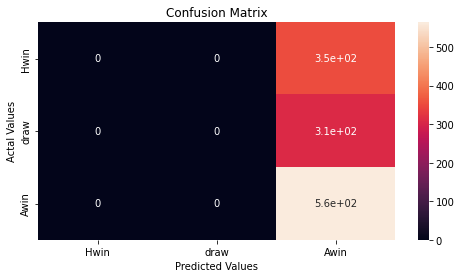

In [ ]:
clf=[knn,xgb,lr,rf]
 
# create a splitter object
kfold = KFold(n_splits = 10) 
modelname=["KNN","XGBoost","Logistic regression","Random forest"]
 
 ## Running loop for  each model to train, test and showing perfomance

for i in range(len(clf)):
    # Training the model
    clf[i].fit(X_train,y_train)
    # Predicting for x_test
    y_predvalid=clf[i].predict(X_valid)
    accvalid = accuracy_score(y_valid, y_predvalid)
  
     
    print('Accuracy of testing: %.3f' % accvalid)
    # Predicting for training data
    y_predtrain=clf[i].predict(X_train)
    acctrain = accuracy_score(y_predtrain, y_train)
    print('Accuracy of training: %.3f' % acctrain)  
   
    # Showing the training accuracy of the of the model
    scores = cross_val_score(clf[i], X_train, y_train, cv=StratifiedKFold(n_splits=5))
   
    print("scores of training")
    print(scores)
    print(scores.mean())  
    # Creating the confusion matrix for testing
    print("Confusion matrix of testing data")
    cm = confusion_matrix(y_valid, y_predvalid)
    cm_df = pd.DataFrame(cm,index = ['Hwin','draw','Awin'],columns = ['Hwin','draw','Awin'])

    plt.figure(figsize=(8,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')

    print(modelname[i])
    plt.show()
    print()
    print()
    print()
    # Creating the confusion matrix for training
    print("confusion matrix of training data")
    cm = confusion_matrix(y_train, y_predtrain)
    
 
 

    plt.figure(figsize=(8,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')

    print(modelname[i])
    plt.show()
    print()
    print()
    print()

In [ ]:
## Metrics evaluation

def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
 
    f1 = f1_score(y_test, y_pred, average='macro')
    mcc = matthews_corrcoef(y_test, y_pred)
    #auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1],average='macro'),4)
    #auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1],average='macro'),4) 
    
    return accuracy, precision, recall, f1, mcc
    # auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['KNN', 'XGBoost', 'Logistic regression', 'Random forrest']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
    # 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model

In [ ]:
##Score of the model
# model_name = ['KNN', 'XGBoost', 'Logistic regression', 'Random forrest']
model_list_base = [knn,xgb,lr,rf]

t1=score_all_classification(model_list_base, X_train, y_train, X_test, y_test)
 
t2=score_all_classification(model_list_base, X_train, y_train, X_train, y_train)

t3=score_all_classification(model_list_base, X_train, y_train, x_test1, y_test1)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Table for testing data

In [ ]:
t1

,Model,Accuracy,Precision,Recall,F1 Score,MCC
0,KNN,0.395833,0.372771,0.374957,0.369821,0.068355
1,XGBoost,0.514974,0.412546,0.435709,0.382270,0.219464
2,Logistic regression,0.516927,0.470227,0.449096,0.391105,0.227202
3,Random forrest,0.444010,0.148003,0.333333,0.204989,0.000000


#### Logistic regression shows the best accuracy for the training dataset

##### Table for training data

In [ ]:
t2

,Model,Accuracy,Precision,Recall,F1 Score,MCC
0,KNN,0.611767,0.591038,0.590015,0.587259,0.398308
1,XGBoost,0.552728,0.618935,0.458903,0.423778,0.270148
2,Logistic regression,0.533388,0.472949,0.446096,0.394580,0.233428
3,Random forrest,0.461523,0.153841,0.333333,0.210521,0.000000


### KNN shows the best accuracy on training dataset

##### Table for recent testing data

In [ ]:
t3

,Model,Accuracy,Precision,Recall,F1 Score,MCC
0,KNN,0.568841,0.548326,0.547016,0.547452,0.324911
1,XGBoost,0.550725,0.574554,0.459527,0.435383,0.270632
2,Logistic regression,0.543478,0.537027,0.447920,0.402426,0.251765
3,Random forrest,0.449275,0.149758,0.333333,0.206667,0.000000


### KNN shows the best accuray in the recent dataset

# Hyperparameter tuning

### Hyperparameter tuning for KNN

In [ ]:
 
## Defining parameters for random forrest and XGboost
  ## Defining hyperparameter for KNN
k_range=list(range(1,31))
  
param_grid=dict(n_neighbors=k_range)
knnp = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_iter=100, random_state=5)

### Hyperparameter tuning for Xgboost and Random forrest

In [ ]:


 
 

### Defining hyperparameters  for random forrest and XGboost
randomforresthyperparameter = [
  
    
  {   # Random forrest        
     "n_estimators": np.arange(110,251,501),
              "min_samples_leaf": np.arange(1,6,1),
              "max_features":["log2",0.7,0.9,"auto"],
              "max_samples": np.arange(0.3, 0.7, None),
             }
]
xgboosthyperparameter =[ {# XGBoost
    "n_estimators": np.arange(10,60,10),
    "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}
]

 
 

xgbp = RandomizedSearchCV(xgb, xgboosthyperparameter, cv=5, scoring='accuracy', random_state=42)
 
 
rfp = RandomizedSearchCV(rf, randomforresthyperparameter, cv=5, scoring='accuracy', random_state=42)


### Hyperparamer tuning for Logistic regression

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
### Defining hyperparameters for KNN
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
lrp = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

### Training the models after Tuning the models

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy of testing: 0.439
Accuracy of training: 0.495


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_sel

scores of testing
[0.42532468 0.44625407 0.42996743 0.40065147 0.42996743]
0.4264330132408308


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_sel

scores of training
[0.43336724 0.43031536 0.44399185 0.43380855 0.43482688]
0.4352619791029994
Confusion matrix of testing data
KNN


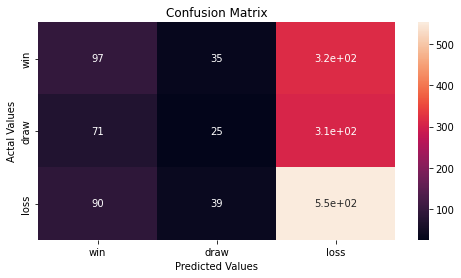




confusion matrix of training data
KNN


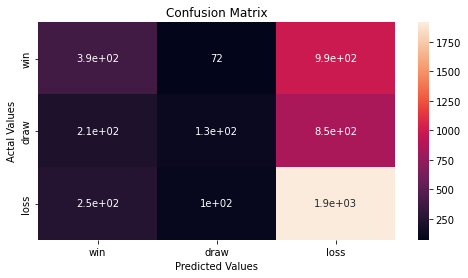




Accuracy of testing: 0.508
Accuracy of training: 0.545
scores of testing
[0.51948052 0.49185668 0.49511401 0.49837134 0.46579805]
0.4941241169254198
scores of training
[0.51271617 0.51475076 0.52749491 0.50814664 0.51120163]
0.5148620230268952
Confusion matrix of testing data
XGBoost


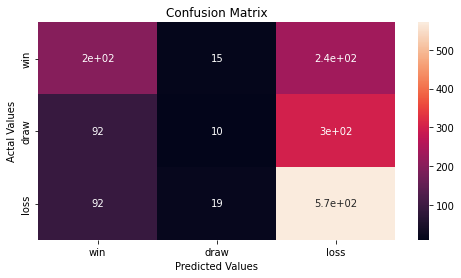




confusion matrix of training data
XGBoost


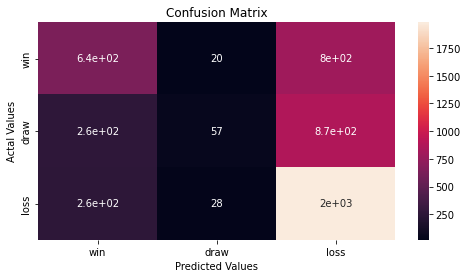




Accuracy of testing: 0.521
Accuracy of training: 0.534
scores of testing
[0.57792208 0.50162866 0.51140065 0.49837134 0.47557003]
0.5129785523922331
scores of training
[0.53102747 0.52187182 0.52545825 0.5203666  0.53360489]
0.5264658046256836
Confusion matrix of testing data
Logistic regression


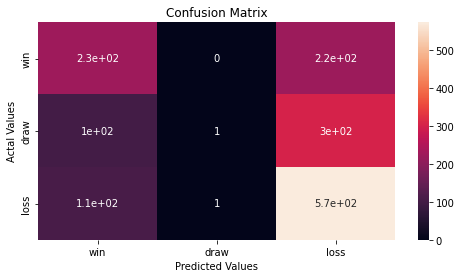




confusion matrix of training data
Logistic regression


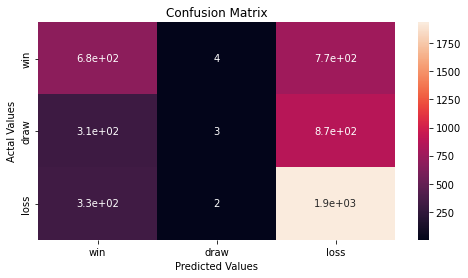




Accuracy of testing: 0.474
Accuracy of training: 0.490
scores of testing
[0.47402597 0.47882736 0.4723127  0.44299674 0.46579805]
0.4667921654892339
scores of training
[0.47304171 0.49542218 0.47250509 0.47759674 0.47861507]
0.4794361580680116
Confusion matrix of testing data
Random forrest


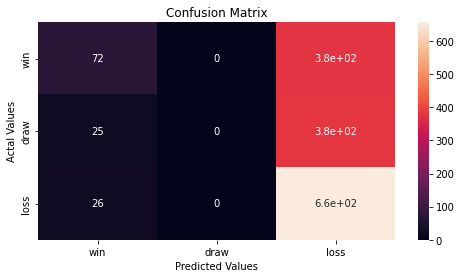




confusion matrix of training data
Random forrest


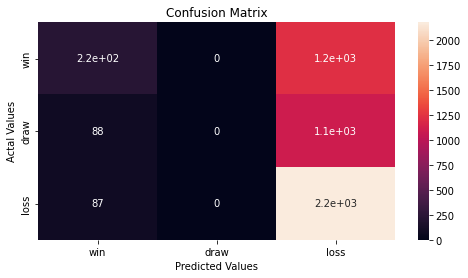

In [ ]:
clf=[knnp,xgbp,lrp,rfp]
modelname=["KNN","XGBoost","Logistic regression","Random forrest"]
# Training the model
for i in range(len(clf)):
  clf[i].fit(X_train,y_train)
# Predicting for x_test
  y_predtest=clf[i].predict(X_test)
  acctest = accuracy_score(y_test, y_predtest)
  
  print('Accuracy of testing: %.3f' % acctest)
# Predicting for training data
  y_predtrain=clf[i].predict(X_train)
  acctrain = accuracy_score(y_predtrain, y_train)
  print('Accuracy of training: %.3f' % acctrain)  
# Showing the testing accuracy of the of the model
  scores = cross_val_score(clf[i], X_test, y_test, cv=5)
  print("scores of testing")
  print(scores)
  print(scores.mean())
# Showing the training accuracy of the of the model
  scores = cross_val_score(clf[i], X_train, y_train, cv=5)
  print("scores of training")
  print(scores)
  print(scores.mean())  
# Creating the confusion matrix for testing
  print("Confusion matrix of testing data")
  cm = confusion_matrix(y_test, y_predtest)
  cm_df = pd.DataFrame(cm,
                     index = ['win','draw','loss'], 
                     columns = ['win','draw','loss'])

  plt.figure(figsize=(8,4))
  sns.heatmap(cm_df, annot=True)
  plt.title('Confusion Matrix')
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  
  print(modelname[i])
  plt.show()
  print()
  print()
  print()
  # Creating the confusion matrix for training
  print("confusion matrix of training data")
  cm = confusion_matrix(y_train, y_predtrain)
  cm_df = pd.DataFrame(cm,
                     index = ['win','draw','loss'], 
                     columns = ['win','draw','loss'])

  plt.figure(figsize=(8,4))
  sns.heatmap(cm_df, annot=True)
  plt.title('Confusion Matrix')
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  
  print(modelname[i])
  plt.show()
  print()
  print()
  print()

In [ ]:
##Score of the model
# model_name = ['KNN', 'XGBoost', 'Logistic regression', 'Random forrest']
model_list_base = [knnp,xgbp,lrp,rfp]

t1p=score_all_classification(model_list_base, X_train, y_train, X_test, y_test)
 
t2p=score_all_classification(model_list_base, X_train, y_train, X_train, y_train)


t3p=score_all_classification(model_list_base, X_train, y_train, x_test1, y_test1)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
t1p

,Model,Accuracy,Precision,Recall,F1 Score,MCC
0,KNN,0.439453,0.365845,0.362871,0.322636,0.065726
1,XGBoost,0.507812,0.420578,0.435047,0.386847,0.205776
2,Logistic regression,0.520833,0.513641,0.448662,0.386562,0.233475
3,Random forrest,0.473958,0.349875,0.374078,0.292667,0.136250


##### Table for testing data after tuned

In [ ]:
print("After tuning")
print(t1p)
print()
print("Before tuning")
print(t1)

After tuning
                 Model  Accuracy  Precision    Recall  F1 Score       MCC
0                  KNN  0.439453   0.365845  0.362871  0.322636  0.065726
1              XGBoost  0.507812   0.420578  0.435047  0.386847  0.205776
2  Logistic regression  0.520833   0.513641  0.448662  0.386562  0.233475
3       Random forrest  0.473958   0.349875  0.374078  0.292667  0.136250

Before tuning
                 Model  Accuracy  Precision    Recall  F1 Score       MCC
0                  KNN  0.395833   0.372771  0.374957  0.369821  0.068355
1              XGBoost  0.514974   0.412546  0.435709  0.382270  0.219464
2  Logistic regression  0.516927   0.470227  0.449096  0.391105  0.227202
3       Random forrest  0.444010   0.148003  0.333333  0.204989  0.000000


### Observations on test data
#### All models have increased their perfomance after tuning the models except for xgboost .
#### But the models are showing accuracies in the range of 50
#### The accuracy of KNN is only 39 before tuning

##### Table for training data after tuned

In [ ]:
print("After tuning")
print(t2p)
print()
print("Before tuning")
print(t2)

After tuning
                 Model  Accuracy  Precision    Recall  F1 Score       MCC
0                  KNN  0.495114   0.462998  0.406396  0.381039  0.153289
1              XGBoost  0.544788   0.545478  0.453415  0.415278  0.253340
2  Logistic regression  0.533591   0.463045  0.441936  0.386174  0.232369
3       Random forrest  0.489617   0.348552  0.372123  0.295294  0.134292

Before tuning
                 Model  Accuracy  Precision    Recall  F1 Score       MCC
0                  KNN  0.611767   0.591038  0.590015  0.587259  0.398308
1              XGBoost  0.552728   0.618935  0.458903  0.423778  0.270148
2  Logistic regression  0.533388   0.472949  0.446096  0.394580  0.233428
3       Random forrest  0.461523   0.153841  0.333333  0.210521  0.000000


### Observations on training data
#### KNN shows a good accuracy of 60 percent before tuning but declined after tuning 
#### logistic regression and Xgboost has not shown a significant increase after tuning the parameters.
#### Accuracy of Random forrest falls in the range  of 40 percent 

##### Table for recent testing data after tuned

In [ ]:
print("After tuning")
print(t3p)
print()
print("Before tuning")
print(t3)

After tuning
                 Model  Accuracy  Precision    Recall  F1 Score       MCC
0                  KNN  0.478261   0.451478  0.390018  0.356905  0.129792
1              XGBoost  0.528986   0.484171  0.443398  0.420038  0.226793
2  Logistic regression  0.547101   0.705807  0.448658  0.401396  0.260057
3       Random forrest  0.460145   0.311671  0.351146  0.265329  0.066532

Before tuning
                 Model  Accuracy  Precision    Recall  F1 Score       MCC
0                  KNN  0.568841   0.548326  0.547016  0.547452  0.324911
1              XGBoost  0.550725   0.574554  0.459527  0.435383  0.270632
2  Logistic regression  0.543478   0.537027  0.447920  0.402426  0.251765
3       Random forrest  0.449275   0.149758  0.333333  0.206667  0.000000


### Observations on recent test data

##### KNN has shown an accuracy of 56 percent before tuning and Xgboost has shown an accuracy of 55 percent before tuning
##### Knn and Xgboost have decrease their accuracy after tuning while logistic regression and random forrest not shown much increase